In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def compute_xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Compute x(s), y(s) from s and theta(s), starting at (x_s_a, y_s_a).
    Returns x, y.
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    return x, y

def plot_xy_coordinates(s, theta, x, y, x_s_a=0, y_s_a=0, 
                        ax_theta=None, ax_xy=None, title_prefix=""):
    """
    Plot theta(s) and y(x) on provided axes.
    """
    ax_theta.plot(s, theta)
    ax_theta.set_title(f"{title_prefix}$\\theta(s)$")
    ax_theta.set_ylabel("$\\theta$")
    ax_theta.set_xlabel("s")
    ax_theta.axis('equal')
    ax_theta.grid()

    ax_xy.plot(x, y)
    ax_xy.set_title(f"{title_prefix}y(x)")
    ax_xy.set_ylabel("y")
    ax_xy.set_xlabel("x")
    ax_xy.axis('equal')
    ax_xy.grid()
    ax_xy.scatter(x_s_a, y_s_a)
    ax_xy.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

def compare_xy_coordinates(s1, theta1, s2, theta2, x_s_a=0, y_s_a=0):
    """
    Compute and plot two sets of (theta, x, y) side by side:
    - left: s1, theta1
    - right: s2, theta2
    """
    x1, y1 = compute_xy_coordinates(s1, theta1, x_s_a, y_s_a)
    x2, y2 = compute_xy_coordinates(s2, theta2, x_s_a, y_s_a)

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    # Left plots
    plot_xy_coordinates(s1, theta1, x1, y1, x_s_a, y_s_a, 
                        ax_theta=axs[0,0], ax_xy=axs[1,0], 
                        title_prefix="Initial guess: ")

    # Right plots
    plot_xy_coordinates(s2, theta2, x2, y2, x_s_a, y_s_a, 
                        ax_theta=axs[0,1], ax_xy=axs[1,1], 
                        title_prefix="Calculated: ")

    plt.tight_layout()
    plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.8438524217732386
            Iterations: 91
            Function evaluations: 9372
            Gradient evaluations: 91
Energy: -1.843852


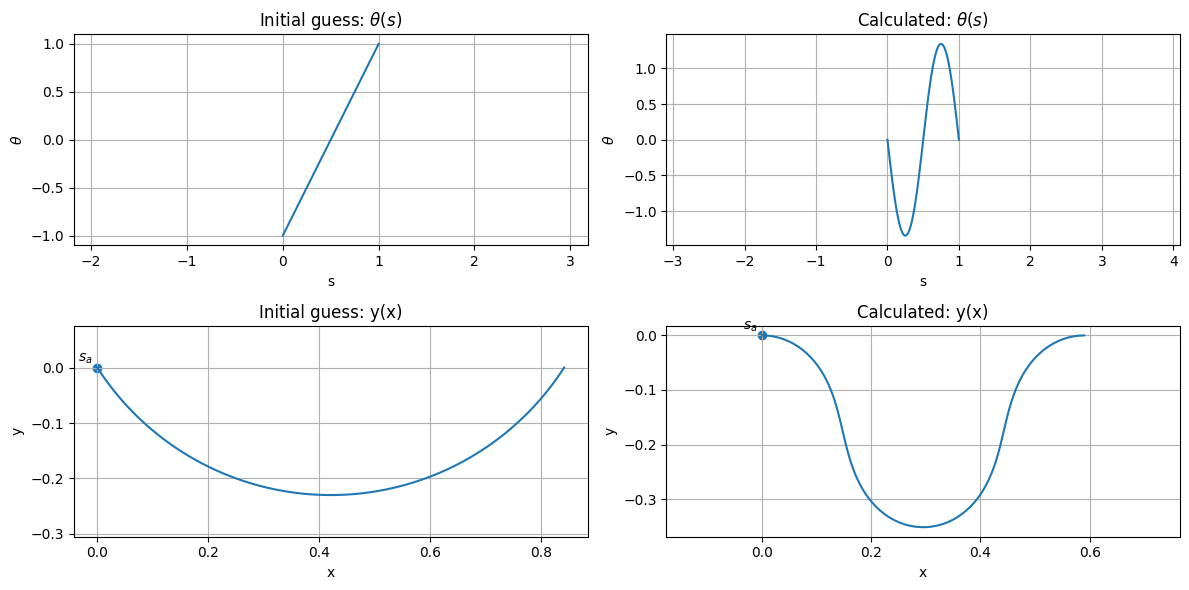

In [107]:
def beam_energy(theta, h, E, I, P):
    n = len(theta)

    sum1 = 0
    for i in range(n-1):
        sum1 += (theta[i+1] - theta[i])**2 / h

    sum2 = 0
    for i in range(n):
        sum2 += np.cos(theta[i]) * h

    V = 0.5 * E * I * sum1 + P * (1-sum2)
    return V

E = 1
I = 1
P = -50
length = 1
n = 100
s, h = np.linspace(0, length, n, retstep=True)
theta0 = np.linspace(-1, 1, n)

sol = minimize(
    beam_energy, 
    theta0, 
    (h, E, I, P), 
    constraints=({"type": "eq", "fun": lambda theta: theta[ 0]}, 
                 {"type": "eq", "fun": lambda theta: theta[-1]}),
    options={"maxiter": 200, "disp": True}
)

theta_min = sol.x

print("Energy:", round(beam_energy(sol.x, h, E, I, P), 6))
compare_xy_coordinates(s, theta0, s, theta_min)

In [3]:
from scipy.optimize import minimize

start_pos = np.ones(6)*(1/6.) #or whatever

#Says one minus the sum of all variables must be zero
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})

#Required to have non negative values
bnds = tuple((0,1) for x in start_pos)

#res = minimize(beam_energy, start_pos, method='SLSQP', bounds=bnds ,constraints=cons)
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))